## Bike sharing Assignment

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario,BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.
They want to understand the factors affecting the demand for these shared bikes in the American market. 
###### The company wants to know:

*Which variables are significant in predicting the demand for shared bikes.

*How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

##### Business Goal
*Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.

## Step1: Importing Libraries

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Step2: Reading and Understanding Dataset

In [339]:
bikes= pd.read_csv('daybike.csv')

In [340]:
#Inspect the first row
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [341]:
#checking the shape of dataset
bikes.shape

(730, 16)

In [342]:
#checking the size of dataset
bikes.size

11680

In [343]:
#check dataframe for null and datatype 
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [344]:
#Describing the numerical columns
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [345]:
#coulmns in data set
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [346]:
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

##### We can see the dataset has 730 rows and 16 columns and no null values

## Step2.1 Cleaning the Data

In [347]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [348]:
# Converting date to Pandas datetime format
bikes['dteday'] = pd.to_datetime(bikes['dteday']).dt.date

### Step2.1.1 Dropping columns that are not useful for analysis

#### - 	instant- We can see this columnn 'instant' is not useful, it is just an row identifier
#### - dteday- We can also observe that  'dteday' is not useful as we already have month  and year column also we won't be doing day               to day analysis
#### - casual-registered- These columns can also be removed as casual+registered=cnt

In [349]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [350]:
bikes.drop(['instant','dteday','casual','registered'],inplace=True,axis=1)

In [351]:
#checking dataset after dropping columns
bikes.shape

(730, 12)

In [352]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step2.2 Handling Missing values

In [353]:
#checking misiing value in columns
bikes.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### Finds: we find that there are no missing values to handle

### Step2.3 Checking for Outliers in dataset

In [354]:
# Displaying coloumns in dataset
bikes.columns
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [355]:
#describing data with numerical valures in seperate dataframe to check for outliers
numlist=bikes[['temp','atemp','hum','windspeed']]
numlist.describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


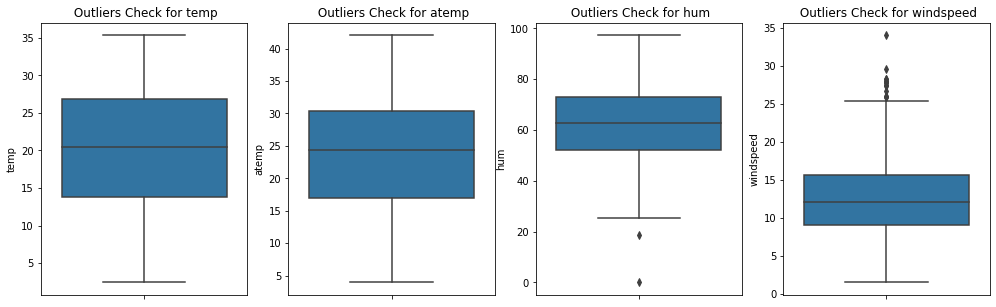

In [356]:
plt.figure(figsize=(17,5))
l=1
for col in numlist:
    plt.subplot(1,4,l)
    sns.boxplot(y=col, data=bikes)
    plt.title(" Outliers Check for "+ col )
    l+=1

##### Inference:As we can observe there are no outliers or extreme in these columns thats a good thing

## Step3 Performing EDA
##### -Visualising data( numerical and categorical )
##### -Finding correlation of predictor variables( multicollinearity )
##### -Changing Season and weathersit and other categorical variables to categorical string types as mentioned

In [357]:
#reading data
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [358]:
bikes.shape

(730, 12)

### Step3.1 Visualising data( numerical and categorical )

In [359]:
#Gathering numerical variables and drawing pairplots
numlist=bikes[['temp','atemp','hum','windspeed','cnt']]

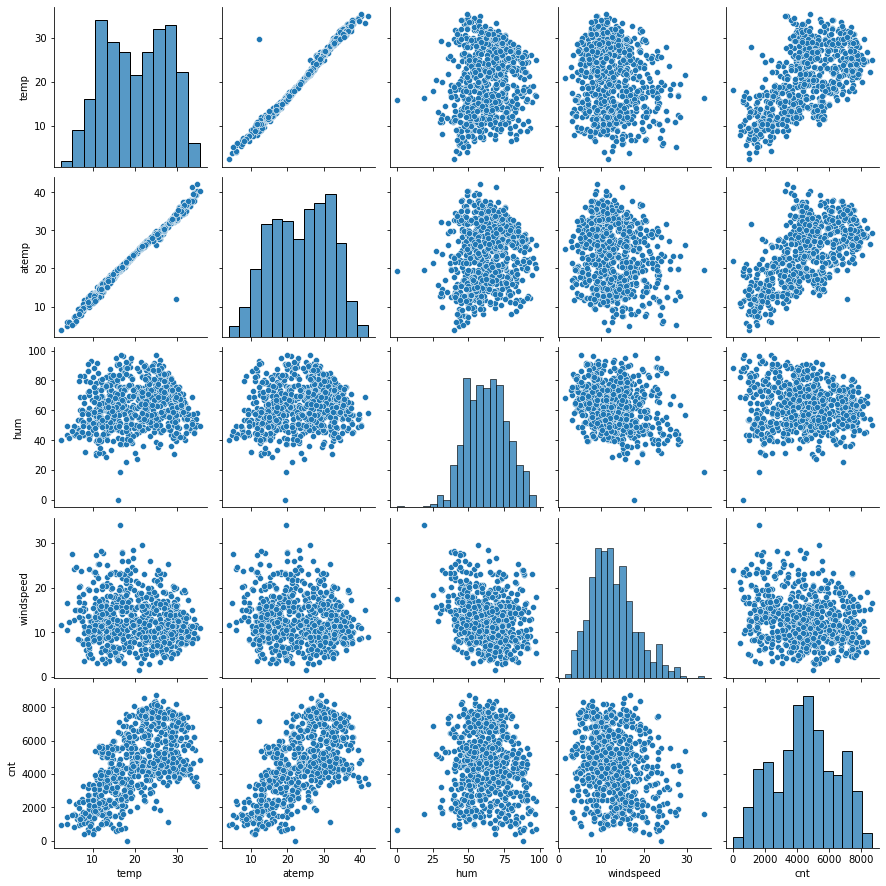

In [360]:
#Drawing pairplot to find some insights
sns.pairplot(numlist)

##### Inference: We can observe that that temp and atemp are linearly related both predictor variables 
#####                   We can also observe a relationship between 'cnt' and 'temp' 

### Step3.2 Finding correlation of continuos predictor variables( multicollinearity )

<AxesSubplot:>

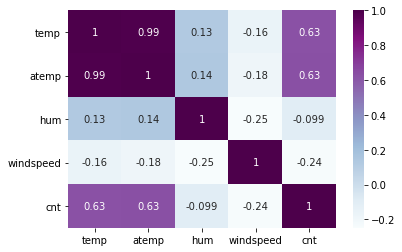

In [361]:
## Finding correlation between numerical continous variables for checking multi-collinearity and its effect
sns.heatmap(numlist.corr(),annot=True,cmap='BuPu')

##### Inference: -We can clearly observe from this heatmap that 'atemp' and 'temp' are highly correlated and both are predictor variables                                                  so we need to drop one as it could lead to Multicollinearity.
#####                  -We can also observe 'cnt' (outcome variable ) has good correlation with 'temp'

### Step3.3 Changing Season and weathersit and other categorical variables to categorical string types

In [362]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [363]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [364]:
bikes.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikes.weathersit.replace({1:'clear',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikes.mnth = bikes.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikes.weekday = bikes.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [365]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [366]:
#Printing all unique values of values replaced column to inspect
print(bikes.season.unique())
print(bikes.yr.unique())
print(bikes.holiday.unique())
print(bikes.weekday.unique())
print(bikes.workingday.unique())
print(bikes.weathersit.unique())

['spring' 'summer' 'fall' 'winter']
[0 1]
[0 1]
['mon' 'tue' 'wed' 'thu' 'fri' 'sat' 'sun']
[1 0]
['moderate' 'clear' 'bad']


In [367]:
#Loop for value counts in all columns
numeric=bikes.columns
for column in numeric:
    print(column, "+" , bikes[column].value_counts())

season + fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
yr + 0    365
1    365
Name: yr, dtype: int64
mnth + jul     62
oct     62
mar     62
jan     62
may     62
dec     62
aug     62
nov     60
jun     60
apr     60
sept    60
feb     56
Name: mnth, dtype: int64
holiday + 0    709
1     21
Name: holiday, dtype: int64
weekday + tue    105
mon    105
thu    104
sat    104
fri    104
wed    104
sun    104
Name: weekday, dtype: int64
workingday + 1    504
0    226
Name: workingday, dtype: int64
weathersit + clear       463
moderate    246
bad          21
Name: weathersit, dtype: int64
temp + 10.899153    5
26.035000    5
29.144153    4
27.880000    4
23.130847    4
            ..
10.909567    1
17.459153    1
12.265847    1
27.230847    1
17.425000    1
Name: temp, Length: 498, dtype: int64
atemp + 32.73440    4
18.78105    3
31.85040    3
29.76730    2
28.72500    2
           ..
28.72625    1
19.50730    1
27.52665    1
21.33685    1
15.40375    1
N

In [368]:
#Overviewing dataset
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


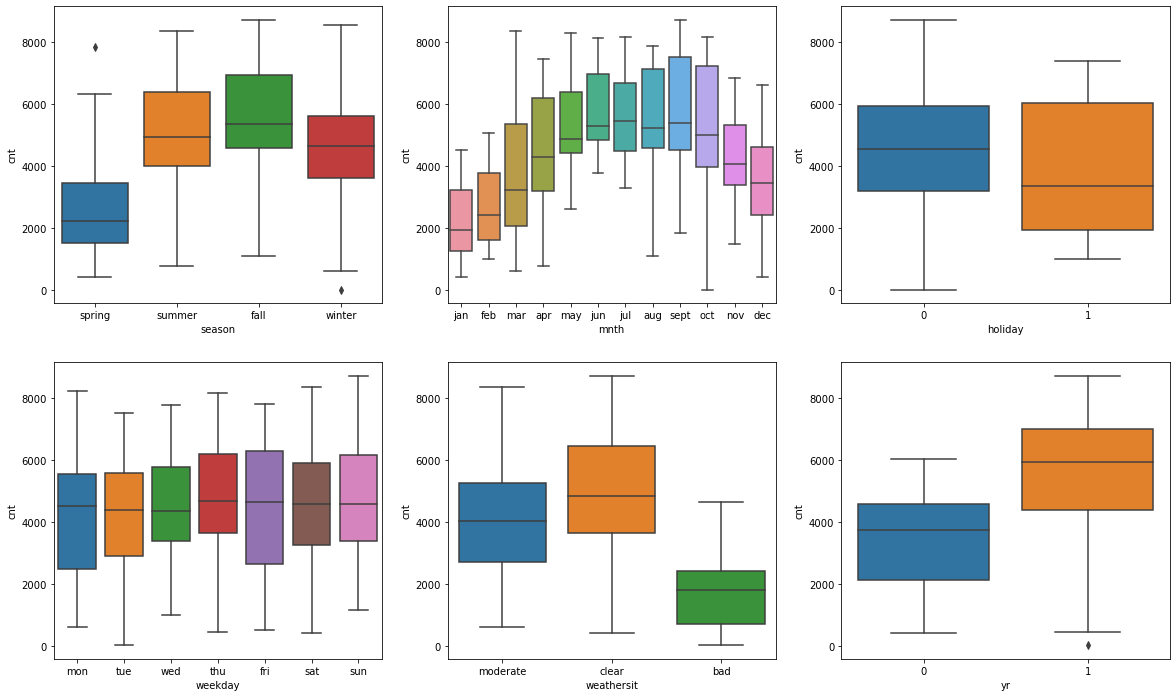

In [369]:
# Visualising categorical predictor variables with outcome variables to their affect
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.show()

#### Finds:Insights from above plots
#### -Spring season has lowest demand while fall sees the highest
#### -Demand increases and decreases from start to end year
#### -Demand for next year 2019 is high
#### -Demand seems to affected and increased when weather is clear
#### -Demand seems to be decreased on holidays
#### -There is no significant difference between rentals vs weekdays, except that Thursdays and sundays have a higher variation in rentals than others.
   

### Step3.4Multicollinearity check and dropping columsn with highest collinearity

<AxesSubplot:>

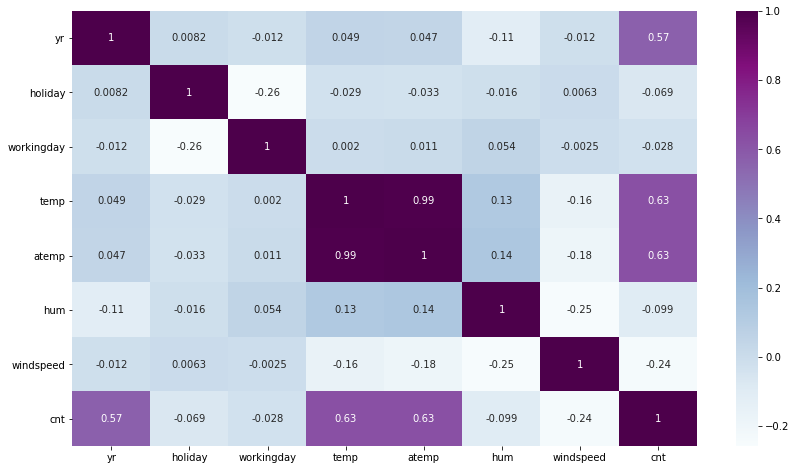

In [370]:
## Correlation of whole dataset together
plt.figure(figsize=(14,8))
sns.heatmap(bikes.corr(),annot=True,cmap='BuPu')

Finds: We can observe that atemp and temp seems to be highly correlated so we should drop one of them

In [371]:
# dropping atemp from dataset
bikes.drop('atemp',inplace=True,axis=1)

In [372]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


<AxesSubplot:>

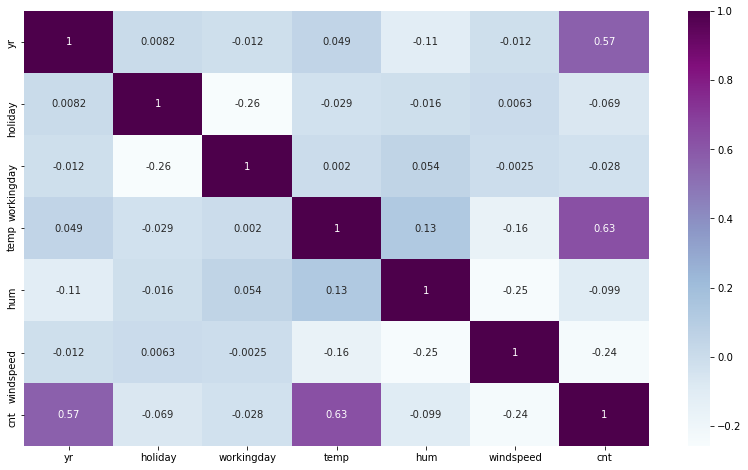

In [373]:
#Checking correlation after dropping 'atemp'
plt.figure(figsize=(14,8))
sns.heatmap(bikes.corr(),annot=True,cmap='BuPu')

<AxesSubplot:xlabel='temp', ylabel='cnt'>

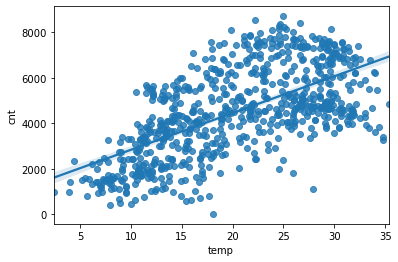

In [374]:
#Visualising highly correlated predictor variable with outcome variable
sns.regplot(x=bikes.temp,y=bikes.cnt,data=bikes)

Finds: We can infer that there is a linear relation between 'cnt' and 'temp'
means demand for bikes kind of increases with increase in temperature

## Step4 Data preperation model Training Linear Regression

### 4.1 Creating dummy variables to convert all categorical variables 

In [375]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


In [376]:
season_id=pd.get_dummies(bikes['season'],drop_first=True)
month_id=pd.get_dummies(bikes['mnth'],drop_first=True)
weekday_id=pd.get_dummies(bikes['weekday'],drop_first=True)
weathersit_id=pd.get_dummies(bikes['weathersit'],drop_first=True)

In [377]:
bikes=pd.concat([bikes,season_id,month_id,weekday_id,weathersit_id],axis=1)

In [378]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sept', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'clear',
       'moderate'],
      dtype='object')

In [379]:
#dropping the categorical columns
bikes.drop(['season','mnth','weekday','weathersit'],inplace=True,axis=1)

In [380]:
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,clear,moderate
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Step4.2 Splitting the data into Training set and Test set

In [381]:
from sklearn.model_selection import train_test_split

In [382]:
#printing the shape before split
print(bikes.shape)

(730, 29)


In [383]:
#splitting dataset in train test set
df_train,df_test=train_test_split(bikes,train_size=0.7,test_size=0.3,random_state=42)

In [384]:
df_train.shape

(510, 29)

In [385]:
df_test.shape

(219, 29)

In [386]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,clear,moderate
683,1,0,1,13.188347,62.0417,10.250129,5445,0,0,1,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,15.716653,70.9583,12.708493,5478,0,0,1,...,1,0,0,0,0,0,1,0,0,1
163,0,0,1,26.035000,49.4583,20.458450,5020,0,1,0,...,0,0,0,0,0,0,0,1,1,0
360,0,0,1,13.325000,76.2500,12.626150,1162,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,26.957500,79.3750,4.458569,7572,0,0,1,...,1,0,0,0,0,1,0,0,0,1


## Feature Scaling of the continuous Variables
### - Rescaling should be done after Train_Test_split
#### -Rescale the variables so that they have a comparable scale

In [387]:
from sklearn.preprocessing import MinMaxScaler

In [388]:
scaler=MinMaxScaler()

In [389]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables and dependent outcome variable
num_vars=['temp','hum','windspeed']

In [390]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [391]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,clear,moderate
683,1,0,1,0.327133,0.639330,0.327101,5445,0,0,1,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.731215,0.419004,5478,0,0,1,...,1,0,0,0,0,0,1,0,0,1
163,0,0,1,0.717562,0.509660,0.708724,5020,0,1,0,...,0,0,0,0,0,0,0,1,1,0
360,0,0,1,0.331287,0.785745,0.415925,1162,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.817947,0.110593,7572,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [392]:
#diving X_train and y_train from dataset
y_train=df_train.pop('cnt')

In [393]:
y_train.head()

683    5445
645    5478
163    5020
360    1162
640    7572
Name: cnt, dtype: int64

In [394]:
X_train=df_train

In [395]:
X_train.shape

(510, 28)

In [396]:
#we have X_train and y_train from the data

# Step5 Building a Model
#### Approach
-Selecting top 15 columns

-Using a combination of RFE Approach
and manual elimination using P-value and VIF(Variance inflation factor)
### $ VIF_i = \frac{1}{1 - {R_i}^2} $


#### 5.1 Recursive Feature Elimination

In [397]:
#building a model using Sklearn using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [398]:
lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [399]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
19,1,True,sept
17,1,True,nov
16,1,True,may
15,1,True,mar
26,1,True,clear
10,1,True,dec
8,1,True,winter
13,1,True,jul
27,1,True,moderate


In [400]:
#Selecting and saving top features to 15 by RFE
selected_features= rfe_ranking.loc[rfe_ranking['rank']==1,'features'].values

In [401]:
selected_features

array(['yr', 'sept', 'nov', 'may', 'mar', 'clear', 'dec', 'winter', 'jul',
       'moderate', 'spring', 'holiday', 'temp', 'windspeed', 'hum'],
      dtype=object)

### 5.2 Manual Elimination using statsmodel

In [402]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Function to build a model using statsmodel api

In [403]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def stat_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#### Function to calculate VIFs

In [404]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def find_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## 5.2 Building our First Model
### Approach-
Using all the variables selected by RFE and dropping one by one using P-Value
and VIFs(elimination using how significance the Predictor variable and how much it is interealted with other predictor variables)

### Model 1 - Start with all variables selected by RFE

In [405]:
selected_features

array(['yr', 'sept', 'nov', 'may', 'mar', 'clear', 'dec', 'winter', 'jul',
       'moderate', 'spring', 'holiday', 'temp', 'windspeed', 'hum'],
      dtype=object)

In [406]:
#calling model building function
stat_model(selected_features)
#calling VIF function
find_vif(selected_features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.1
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.48e-186
Time:                        21:34:54   Log-Likelihood:                -4114.7
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     494   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1412.7732    420.859      3.357      0.0

we can see that in model some variable has vif and also p value 

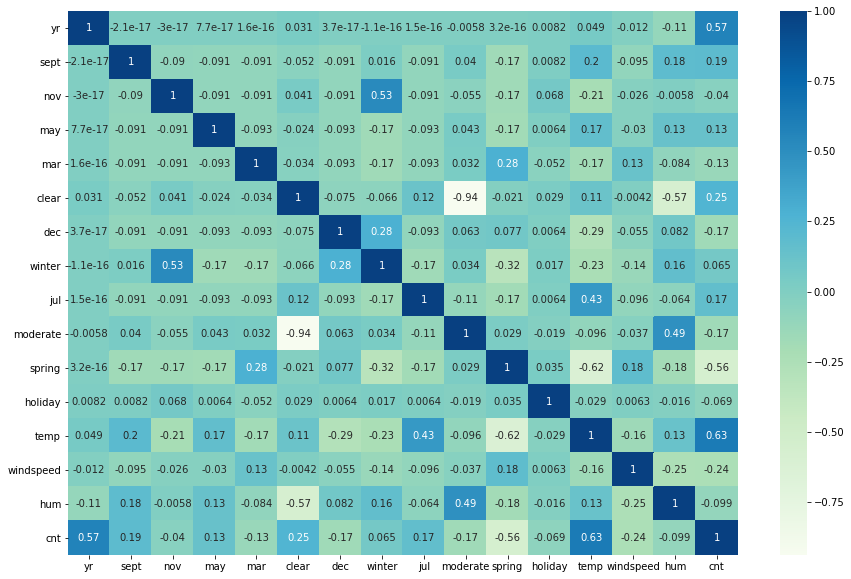

In [407]:
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikes[['yr', 'sept', 'nov', 'may', 'mar', 'clear', 'dec', 'winter', 'jul',
       'moderate', 'spring', 'holiday', 'temp', 'windspeed', 'hum','cnt']].corr(), cmap='GnBu', annot=True)
plt.show()


### Model 2
##### -Removing the variable 'hum' based on its Very High 'VIF' value.
##### -Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can                 be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [408]:
#removing variable 'hum'
selected_features= selected_features[~np.isin(selected_features, 'hum')]
selected_features

array(['yr', 'sept', 'nov', 'may', 'mar', 'clear', 'dec', 'winter', 'jul',
       'moderate', 'spring', 'holiday', 'temp', 'windspeed'], dtype=object)

In [409]:
#calling model and vif function
stat_model(selected_features)
find_vif(selected_features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.2
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.91e-183
Time:                        21:34:56   Log-Likelihood:                -4123.7
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     495   BIC:                             8341.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        200.6332    312.161      0.643      0.5

##### Inference: -As we can see that after removing 'hum' Vif got decreased,decreasing Multicollinearity
#####                  -Also R2 and Adjusted R2 barely descreased.

## Model 3
##### -Removing the variable 'may' based on its Very High 'p' value.


In [410]:
#removing variable 'may'
selected_features= selected_features[~np.isin(selected_features, 'may')]
selected_features

array(['yr', 'sept', 'nov', 'mar', 'clear', 'dec', 'winter', 'jul',
       'moderate', 'spring', 'holiday', 'temp', 'windspeed'], dtype=object)

In [411]:
#calling function to check VIF and to build model
stat_model(selected_features)
find_vif(selected_features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          6.15e-184
Time:                        21:34:56   Log-Likelihood:                -4125.2
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.1679    310.747      0.847      0.3

##### Inference:- We can observe that p value is controlled while VIF is still high so we make another model

## Model 4
##### We can remove 'moderate' in terms of high VIF, we didn't removed 'clear' and 'temp' even they have more high vif as they could help explain bike rentals coefficient better

In [412]:
#removing variable 'moderate'
selected_features= selected_features[~np.isin(selected_features, 'moderate')]
selected_features

array(['yr', 'sept', 'nov', 'mar', 'clear', 'dec', 'winter', 'jul',
       'spring', 'holiday', 'temp', 'windspeed'], dtype=object)

In [413]:
#calling function to check VIF and to build model
stat_model(selected_features)
find_vif(selected_features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     185.2
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.18e-174
Time:                        21:34:56   Log-Likelihood:                -4150.0
No. Observations:                 510   AIC:                             8326.
Df Residuals:                     497   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1706.1103    247.002      6.907      0.0

## Model 5
#### We can remove 'windspeed' in terms of high VIF, we didn't removed 'clear' and 'temp' even they have more high vif as they could help explain bike rentals coefficient better

In [422]:
#removing variable 'windspeed'
selected_features= selected_features[~np.isin(selected_features, 'windspeed')]
selected_features

array(['yr', 'sept', 'nov', 'mar', 'clear', 'dec', 'winter', 'jul',
       'spring', 'holiday', 'temp'], dtype=object)

In [424]:
#calling function to check VIF and to build model
final_model=stat_model(selected_features)
find_vif(selected_features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     191.7
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.77e-171
Time:                        21:37:40   Log-Likelihood:                -4161.3
No. Observations:                 510   AIC:                             8347.
Df Residuals:                     498   BIC:                             8397.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1115.4152    217.888      5.119      0.0

#### inference:- As we can see above as soon as we remove 'windspeed' or model became efficient and our vif of variables 'temp' and 'clear' got under control.
TOP 11 features have been selected.

 - All the features are statistically significant [low p-value]

 - All variables VIF are under 5

 - The model over is a good fit with Prob (F-statistic): 4.77e-171

 - The model explains 80.9% variability in the training data. Adjusted R-square being 80.5%
#### Hence this is our final model

In [425]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     191.7
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.77e-171
Time:                        21:37:45   Log-Likelihood:                -4161.3
No. Observations:                 510   AIC:                             8347.
Df Residuals:                     498   BIC:                             8397.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1115.4152    217.888      5.119      0.000     687.322    1543.508
yr          2038.0115     76.165     26.758      0.000    1888.368    2187.655
sept         422.9851    140.102      3.019      0.003     147.720     698.250
nov         -627.5275    172.072     -3.647      0.000    -965.604    -289.451
mar          425.7390    163.956      2.597      0.010     103.609     747.869
clear        820.9990     80.089     10.251      0.000     663.645     978.353
dec         -532.5810    162.915     -3.269      0.001    -852.666    -212.496
winter       756.5788    127.545      5.932      0.000     505.986    1007.172
jul         -483.5439    151.892     -3.183      0.002    -781.972    -185.116
spring     -1262.6130    152.569     -8.276      0.000   -1562.372    -962.854
holiday     -546.1855    233.698     -2.337      0.020   -1005.342     -87.029
temp        3738.3776    305.089     12.253      0.000    3138.957    4337.798
==============================================================================
Omnibus:                       77.073   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.733
Skew:                          -0.838   Prob(JB):                     3.40e-35
Kurtosis:                       5.158   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step6 Residual Analysis

In [427]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])
y_train_predicted = final_model.predict(X_train_sm)
res=y_train-y_train_predicted


Text(0.5, 0, 'Errors')

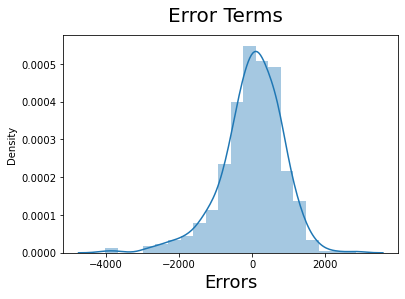

In [428]:
#observing the distributions od residuals or errors
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## With using Q Q plot we can confirm the normal distribution of error or residuals to confirm assumptions

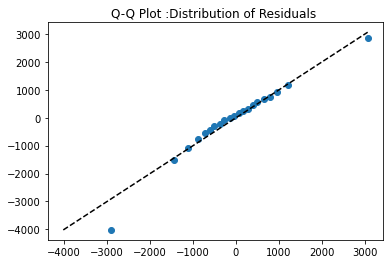

In [429]:
# Verifying the normality of distribution of residuals 
mean = (y_train-y_train_predicted).mean()
std = (y_train-y_train_predicted).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_predicted).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_predicted , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot :Distribution of Residuals ')
plt.show()

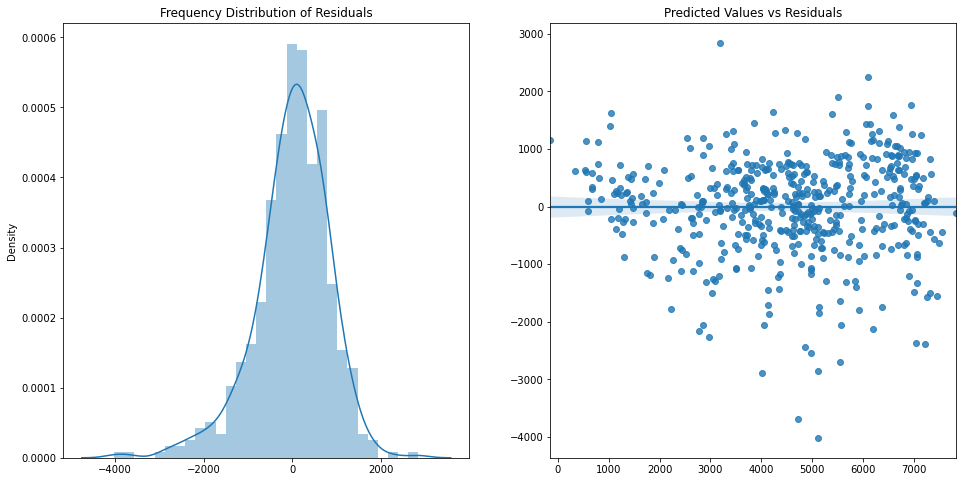

In [430]:
# Residual Analysis of Trained Data
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_predicted, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(y_train_predicted,y_train-y_train_predicted,ax=ax[1])
plt.show()

 ### Hence we can confirm that 
 - Residual errors follow a normal distribution with mean=0
 - Variance of Errors doesnt follow any trends
 - Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

## We can do some  check also for actual vs predicted values

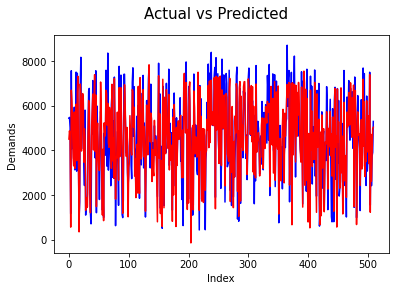

In [431]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_predicted, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

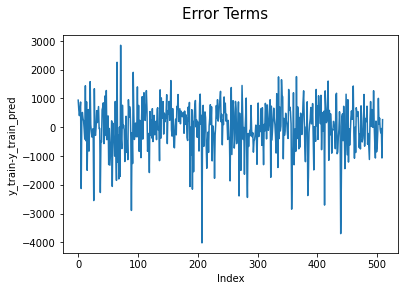

In [432]:
# Distribution of Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_predicted)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()


## Step-7 Making prediction on the test data

In [433]:
#lets check test dataframe
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,clear,moderate
468,1,0,0,20.295000,50.2917,12.791439,7460,0,1,0,...,0,0,0,0,1,0,0,0,1,0
148,0,0,1,27.367500,81.8750,14.333846,4788,0,1,0,...,0,0,0,0,0,0,1,0,1,0
302,0,0,1,13.085847,62.3750,11.833339,3331,0,0,1,...,1,0,0,0,0,0,1,0,1,0
355,0,0,0,17.356653,75.7500,3.167425,3068,1,0,0,...,0,0,0,1,0,0,0,0,0,1
515,1,0,1,27.880000,49.2917,13.083693,7338,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [434]:
df_test.shape

(219, 29)

In [435]:
#splitting the test dataset into X_test and y_test
y_test=df_test.pop('cnt')
X_test=df_test

In [436]:
y_test.head()

468    7460
148    4788
302    3331
355    3068
515    7338
Name: cnt, dtype: int64

In [437]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,aug,...,oct,sept,mon,sat,sun,thu,tue,wed,clear,moderate
468,1,0,0,20.295000,50.2917,12.791439,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
148,0,0,1,27.367500,81.8750,14.333846,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
302,0,0,1,13.085847,62.3750,11.833339,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
355,0,0,0,17.356653,75.7500,3.167425,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
515,1,0,1,27.880000,49.2917,13.083693,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [438]:
X_test.shape

(219, 28)

### NOTE:- We only transform the test data set not fit it as it is unseen data and we consider it not to be available

In [439]:
#Scaling variables in X_test that are not in between 1 and 0
numT_vars=['temp','hum','windspeed']
#Test data to be transformed only, no fitting
X_test[numT_vars]=scaler.transform(X_test[numT_vars])

In [440]:
#checking dataframe to see all selected variables are between 0 and 1
X_test[selected_features].describe()

,yr,sept,nov,mar,clear,dec,winter,jul,spring,holiday,temp
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.063927,0.059361,0.136986,0.657534,0.109589,0.228311,0.068493,0.283105,0.031963,0.527468
std,0.498836,0.245183,0.236840,0.344621,0.475622,0.313092,0.420705,0.253169,0.451539,0.176306,0.229936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047675
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324018
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.507811
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.726388
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970925


In [441]:
selected_features_test=selected_features

In [442]:
final_model.params

const      1115.415158
yr         2038.011476
sept        422.985124
nov        -627.527509
mar         425.738992
clear       820.998953
dec        -532.581006
winter      756.578798
jul        -483.543858
spring    -1262.612994
holiday    -546.185485
temp       3738.377584
dtype: float64

In [443]:
#adding constant to x_test of test dataset
X_test_sm1=sm.add_constant(X_test[selected_features_test])

In [444]:
X_test_sm1.head()

,const,yr,sept,nov,mar,clear,dec,winter,jul,spring,holiday,temp
468,1.0,1,0,0,0,1,0,0,0,0,0,0.543115
148,1.0,0,0,0,0,1,0,0,0,0,0,0.758058
302,1.0,0,0,0,0,1,0,1,0,0,0,0.324018
355,1.0,0,0,0,0,0,1,0,0,1,0,0.453814
515,1.0,1,0,0,0,1,0,0,0,0,0,0.773634


### Predicting y values of given X TEST values

In [445]:
#Predicting y values of given X TEST values
y_test_predicted=final_model.predict(X_test_sm1)

In [446]:
#importing library
from sklearn.metrics import mean_squared_error,r2_score

In [447]:
#calculating difference between r-squared of train data with r-squared of test data
rsquared_train = r2_score(y_train, y_train_predicted)
rsquared_test = r2_score(y_test, y_test_predicted)
print('R-squared for train data:',round(rsquared_train*100,2),'%')
print('R-squared for test data:',round(rsquared_test*100,2),'%')

R-squared for train data: 80.89 %
R-squared for test data: 77.69 %


### Inference: We can observe that the Rsquared of test and train model dataset is close to each other AND under 5%  so it means our model is good in making predictions and its explaining almost 80% of variance in dataset and is generalised

## Step-8 Model evaluation


In [448]:
#calculating difference between r-squared of train data with r-squared of test data
rsquared_train = r2_score(y_train, y_train_predicted)
rsquared_test = r2_score(y_test, y_test_predicted)
print('R-squared for train data:',round(rsquared_train*100,2),'%')
print('R-squared for test data:',round(rsquared_test*100,2),'%')

R-squared for train data: 80.89 %
R-squared for test data: 77.69 %


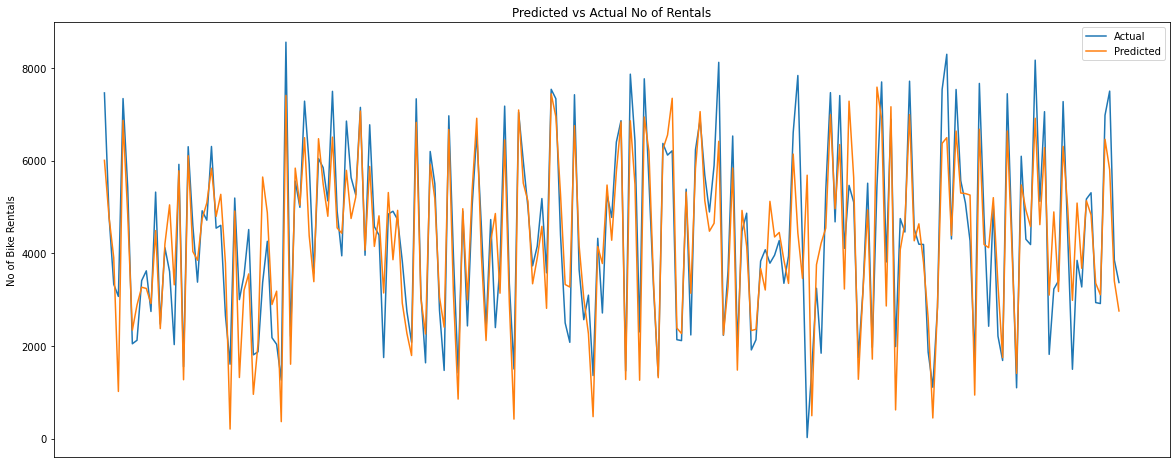

Text(0.5, 1.0, 'Predicted vs Actual No of Rentals')

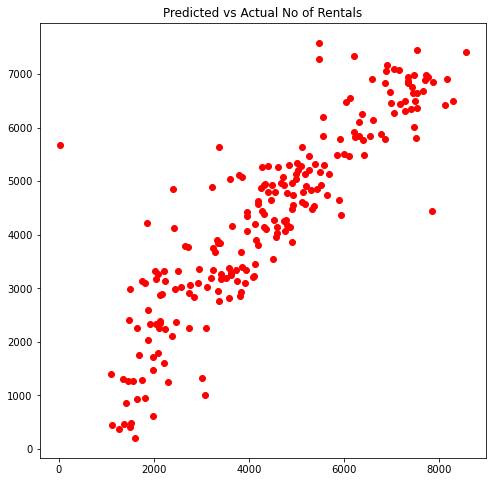

In [449]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_predicted)),y_test_predicted)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_predicted,c='red',cmap="blue")
plt.title('Predicted vs Actual No of Rentals')

### Inference-
 - We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### Inference:- We can observe that predicted and observed value plot shows that our model is considerably accurate

#  - FINAL REPORT - 

In [450]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret 
new=selected_features

In [451]:
lm=stat_model(new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     191.7
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.77e-171
Time:                        21:38:53   Log-Likelihood:                -4161.3
No. Observations:                 510   AIC:                             8347.
Df Residuals:                     498   BIC:                             8397.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1115.4152    217.888      5.119      0.0

In [452]:
print('Coefficent of Final model','\n',lm.params.sort_values(ascending=True))

Coefficent of Final model 
 spring    -1262.612994
nov        -627.527509
holiday    -546.185485
dec        -532.581006
jul        -483.543858
sept        422.985124
mar         425.738992
winter      756.578798
clear       820.998953
const      1115.415158
yr         2038.011476
temp       3738.377584
dtype: float64


## Interpretation of Results
- The above model shows the top features influencing demand in positve linear relation are 'temp','yr','clear' and 'winter' and top features influencing demand in negative linear relation are 'spring','nov','holiday'


In [453]:
lm.params

const      1115.415158
yr         2038.011476
sept        422.985124
nov        -627.527509
mar         425.738992
clear       820.998953
dec        -532.581006
winter      756.578798
jul        -483.543858
spring    -1262.612994
holiday    -546.185485
temp       3738.377584
dtype: float64

## Conclusion
Analysis is carried out using in a Mixed Feature Selection Approach and manual elimination approach, 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features(p-value) and overall fit of the model. 
The 11 most significant features to understand demand have been reported.

The data set is randomly divided into training and test data. Final Model built on training data set explains 81% of the variability and achieves 78% on test data(rounded values).
The final relationship between demand and predictors is as follows.
- cnt = 1115.415158 + 2038.011 yr + 422.985124 sept + -627.527509 nov + 425.738992 mar + 820.998953 clear + -532.581006 dec + 756.578798 winter + -483.543858 jul + -1262.612994 spring + -546.185485 holiday + 3738.377584 temp
Note :

- Data has been cleaned to drop outliers that might affect the model adversely
- The model has been verified for Multicollinearity effects.
- Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit homoscedasticity)
- Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for all interpolations. Extraplorations show significant deviation, not affecting Linear Regression applicability.
- Further Lag plot shows there is no auto-correlation in data.
- Model is stable at 78%+-errors

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on collecting everyday temperature data and should set its marketing according to temperature as increase in temp will lead to increase in demand.
- company should focus marketing and targeting patron mostly in clear season as clear season will lead to increase in demand rather than when its Light Snow or Rain.
- Company should focus on expanding business during Spring,holiday,july,november,december as there will be drop in demand in those time.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
